# Project: Wrangling and Analyze Data

* [Data Gathering](#Data_Gathering)
* [Assessing Data](#Assessing_Data)
* [Cleaning Data](#Cleaning_Data)
* [Storing Data](#Storing_Data)
* [Analyzing and Visualizing Data](#Analyzing_and_Visualizing_Data)
* [Reference List](#Reference_List)

### ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

* Importing the necessary libraries for this project: 

In [1]:
import pandas as pd
import numpy as np
import requests
import json 

# visualisation libraries:
import matplotlib.pyplot as plt
%matplotlib inline

### ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

<a id='Data_Gathering'></a>
* ## Data Gathering:

1. We-Rate-Dogs Twitter archive data:

In [2]:
df_tad = pd.read_csv('twitter-archive-enhanced.csv') # tad = twitter archive data

2. Image prediction data:

In [3]:
url_image = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response_image  = requests.get(url_image)
response_image # to determine whether the request was successful ("200" indicates a successful request). 

<Response [200]>

In [4]:
# saving the requested data into a directory on the local computer.
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response_image.content)

In [5]:
df_ipd = pd.read_csv('image-predictions.tsv', sep = '\t') #ipd = image prediction data

3. Twitter API (tweet_json.txt).

* For this dataframe, the request library method will be used to download the file tweet_json.txt.

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt' 
response_txt = requests.get(url) # requested from the Udacity server.

# saving the requested data into a directory on the local computer.
with open('tweet_json.txt', mode = 'wb') as file:
    file.write(response_txt.content)

In [7]:
# List of dictionaries to build file by file and later convert to a DataFrame
list_ = []
with open('tweet_json.txt', 'r', encoding='utf8') as file:
    for i in file:
        tweet = json.loads(i)
        
        
        # Append to list of dictionaries
        list_.append({ 
                        'tweet_id':    tweet['id'],
                        'Favorites':   tweet['favorite_count'],
                        'Retweets':    tweet['retweet_count']})
                       

# converting to a Pandas dataframe
df_tjt = pd.DataFrame(list_)      # tjt = twitter_json_txt

### ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

<a id='Assessing_Data'></a>
## Assessing Data

* In this section, the assessment process will be conducted in two ways: 

    1- Visual assessment
    
    2- Programmatic assessment

 ###### 1- Visual assessment: 

Here, the data will be assessed by displaying the data on the Jupyter notebook and using other external applications (e.g., Excel, a text editor).

In [8]:
# Display the We-Rate-Dogs Twitter archive data
df_tad.head(60)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


The important columns of We-Rate-Dogs are described as follows:


1- `tweet_id`: this column contains the tweet id of the tweets.


2- `Timestamp`: This column gives the time of the posted tweet.


3 "text": This field contains the original tweet text.


4- `rating_numerator`: rating of the dog


5- `rating_denominator`: rating factor


6- `name`: name of the dogs


7- columns `doggo`, `floofer`, `pupper`, `puppo` are the age stage of dog

In [9]:
# Displaying image prediction data:
df_ipd.head(60)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


The important columns of image prediction data are described as follows:

1- 1`weet_id`: is the last part of the tweet URL after "status."

2- `jpg_url`: image URL

3- `img_num`: the image number corresponding to the most certain forecast (numbered 1 to 4 since tweets can have up to four images).

4- `p1`: the algorithm's top picture prediction for the tweet.

5- `p1_conf`: indicates the algorithm's confidence in its #1 prediction.

6- `p1_dog`: Whether or not the #2 prediction is a breed of dog

7- `p2` and `p3` describe the same information as p1.

In [10]:
# Displaying Twitter's API (tweet_json.txt) data:
df_tjt.head(60)

,tweet_id,Favorites,Retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


The important columns of Twitter's API (tweet_json.txt) data are described as follows:


1- `tweet_id`: this column contains the tweet id of the tweets.


2- `favorites`: favourite count.


3- `Retweets`: retweet count.


4- `timestamp`: date posted on Twitter

###### 1- Programmatic assessment: 

In this step of assessment, Pandas' functions and/or coding methods are used to assess the data.

* ####  We-Rate-Dogs Twitter archive data:

In [11]:
df_tad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_tad.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
df_tad.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [14]:
df_tad.duplicated().sum(), df_ipd.duplicated().sum(), df_tjt.duplicated().sum()

(0, 0, 0)

* #### Image prediction data:

In [15]:
df_ipd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_ipd.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


* #### Twitter's API (tweet_json.txt) data:

In [17]:
df_tjt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   Favorites  2354 non-null   int64
 2   Retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
df_tjt.describe()

,tweet_id,Favorites,Retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


##### ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ   

## Cleaning Step

### A) Tidiness issues (3 issues):

1.	Columns in_reply_to_status_id and in_reply_to_user_id are not necessary for later analysis.


2.	The four dog stages should be in one column.


3.	Data frames will be merged according to the necessity of the analysis.

### B) Quality Issues (14 issues):

1. The columns for the master data frame are not clear and descriptive.


2. There are 181 rows that are not original tweets; instead, they are retweets. The given instructions require analysing only the original retweets.


3. For the prediction images, there are rows that did not predict a dog (given by "false" for three predictions).


4. Names of the breeds in Breed_Prediction_1, Breed_Prediction_2, and Breed_Prediction_3 include "_".  This needs to be removed for good representation and consistency.


5. Some breed names are not consistent (some are in upper case and others are in lower case).


6. Some names are missing or invalid, such as None or A in one of the rows.


7. Some dog names in the column The name of the dog is not capitalized.


8. The column Tweet_ID It should be an object because no calculations are required for this column.


9. ating_denominator has values less than 10. It should be 10.


10. rating_denominator has values greater than 10. It should be 10.


11. There is a rating of 26, but this is not true. Based on the tweet text, the rating is 11.26/10, not 26.


12. rating_numerator's maximum value is 1770. It seems like an outlier that needs to be fixed.


13. There is a rating of 27, but this is not true. Based on the tweet text, the rating is 11.27/10, not 27. Also, the tweet with tweet id(883482846933004288) the rating is 5, but the tweet text says 13.5. The rest of rating of 5 correspond with the tweet text that rated dogs less than 10, so those ratings will be deleted in Issue #14.

14. The minimum value of rating_numerator is 0.It should be more than 10.

### ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

<a id='Cleaning_Data'></a>
## Cleaning Data

In [19]:
# Making copies of original pieces of data

df_tad_clean = df_tad.copy()
df_ipd_clean = df_ipd.copy()
df_tjt_clean = df_tjt.copy()

* ### Cleaning  Tidness issues: 

### Issue #1

##### define: 

Drop the following columns from the df_tad_clean table as they may not be necessary:

- `in_reply_to_status_id` 
- `in_reply_to_user_id`

##### code

In [20]:
df_tad_clean.drop(columns =['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

##### Test 

In [21]:
list(df_tad_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #2

##### Define

The four dog stages should be in one column. Make one column for all four stages, then delete the four columns.

##### Code

In [22]:
df_tad_clean['dog_stage'] = df_tad_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [23]:
df_tad_clean.drop(columns =['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [24]:
#list(df_tad_clean)

### Issue #3

##### Define 

All three dataframes will be merged into a single master dataframe for the tidy, easy, and analytical processing processes. 

##### Code

In [25]:
 master_df = df_tad_clean.merge(df_tjt_clean, on ='tweet_id', how ='left').merge(df_ipd_clean,how ='left', on ='tweet_id')

In [26]:
 master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2297 non-null   object 
 8   rating_numerator            2356 non-null   int64  
 9   rating_denominator          2356 non-null   int64  
 10  name                        2356 non-null   object 
 11  dog_stage                   399 non-null    object 
 12  Favorites                   2354 non-null   float64
 13  Retweets                    2354 

##### ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

* ### Cleaning quality issues

### Issue #1

##### Define

The columns for the master dataframe are not clear and descriptive. Change them to more descriptive names.

##### Code

In [27]:
master_df.columns = ['Tweet_ID', 'Timestamp', 'Tweet_Resource', 'Tweet_Text', 'retweeted_status_id', 
              'retweeted_status_user_id', 'retweeted_status_timestamp', 'Expanded_URLS', 'Rating_Numerator',
              'Rating_Denominator', 'Dog_name', 'Dog_Stage', 'Favorites', 'Retweets', 'Image_ULR', 'Image_number', 
              'Breed_Type_1', 'Prediction_Confidence_1', 'Dog_Prediction_1',
              'Breed_Type_2', 'Prediction_Confidence_2', 'Dog_Prediction_2',
              'Breed_Type_3', 'Prediction_Confidence_3', 'Dog_Prediction_3']




##### Test

In [28]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tweet_ID                    2356 non-null   int64  
 1   Timestamp                   2356 non-null   object 
 2   Tweet_Resource              2356 non-null   object 
 3   Tweet_Text                  2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   Expanded_URLS               2297 non-null   object 
 8   Rating_Numerator            2356 non-null   int64  
 9   Rating_Denominator          2356 non-null   int64  
 10  Dog_name                    2356 non-null   object 
 11  Dog_Stage                   399 non-null    object 
 12  Favorites                   2354 non-null   float64
 13  Retweets                    2354 

### Issue #2

##### Define

As per the given instructions, only original tweets that have ratings should be analyzed.Remove all retweets data from master_df and its associated columns 

##### Code

In [29]:
master_df.retweeted_status_id.isnull().value_counts() #181 rows that are retweets. 2175 rows are original tweets.  

True     2175
False     181
Name: retweeted_status_id, dtype: int64

In [30]:
master_df = master_df[master_df.retweeted_status_id.isnull()]

In [31]:
#Removing all related columns.

master_df.drop(columns =['retweeted_status_id', 'retweeted_status_user_id',
                           'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [32]:
#Test for the removal of the retweets rows and their related columns: 
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tweet_ID                 2175 non-null   int64  
 1   Timestamp                2175 non-null   object 
 2   Tweet_Resource           2175 non-null   object 
 3   Tweet_Text               2175 non-null   object 
 4   Expanded_URLS            2117 non-null   object 
 5   Rating_Numerator         2175 non-null   int64  
 6   Rating_Denominator       2175 non-null   int64  
 7   Dog_name                 2175 non-null   object 
 8   Dog_Stage                364 non-null    object 
 9   Favorites                2175 non-null   float64
 10  Retweets                 2175 non-null   float64
 11  Image_ULR                1994 non-null   object 
 12  Image_number             1994 non-null   float64
 13  Breed_Type_1             1994 non-null   object 
 14  Prediction_Confidence_1 

### Issue #3

##### Define

There are rows that did not predict a dog (given "false" by all three columns, which are p1 dog, p2 dog, and p3 dog). Remove those rows, as they are not related to this analysis.

##### Code 

In [33]:
master_df.drop(master_df.index[master_df['Dog_Prediction_1'] | master_df['Dog_Prediction_2'] | master_df['Dog_Prediction_3'] == False], inplace = True)

##### Test 

In [34]:
master_df.loc[master_df['Dog_Prediction_1'] & master_df['Dog_Prediction_2'] & master_df['Dog_Prediction_3'] == False]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,20562.0,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,12041.0,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
11,889880896479866881,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN,28268.0,...,1.0,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
24,887343217045368832,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,None,NaN,34222.0,...,1.0,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,666435652385423360,2015-11-17 02:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Can you behave? You're ruining my wedding day...",https://twitter.com/dog_rates/status/666435652...,10,10,None,NaN,170.0,...,1.0,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False
2322,666430724426358785,2015-11-17 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh boy what a pup! Sunglasses take this one to...,https://twitter.com/dog_rates/status/666430724...,6,10,None,NaN,330.0,...,1.0,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
2333,666337882303524864,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,https://twitter.com/dog_rates/status/666337882...,9,10,an,NaN,204.0,...,1.0,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
2347,666057090499244032,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,a,NaN,304.0,...,1.0,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True


In [35]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tweet_ID                 1686 non-null   int64  
 1   Timestamp                1686 non-null   object 
 2   Tweet_Resource           1686 non-null   object 
 3   Tweet_Text               1686 non-null   object 
 4   Expanded_URLS            1686 non-null   object 
 5   Rating_Numerator         1686 non-null   int64  
 6   Rating_Denominator       1686 non-null   int64  
 7   Dog_name                 1686 non-null   object 
 8   Dog_Stage                274 non-null    object 
 9   Favorites                1686 non-null   float64
 10  Retweets                 1686 non-null   float64
 11  Image_ULR                1686 non-null   object 
 12  Image_number             1686 non-null   float64
 13  Breed_Type_1             1686 non-null   object 
 14  Prediction_Confidence_1 

### Issue #4

##### Define

The names of the breeds in `Breed_Prediction_1`, `Breed_Prediction_2`, and `Breed_Prediction_3` include "_". This needs to be removed for good representation and consistency.

##### Code

In [36]:
master_df['Breed_Type_1'] = master_df['Breed_Type_1'].str.replace('_',' ')

In [37]:
master_df['Breed_Type_2'] = master_df['Breed_Type_2'].str.replace('_',' ')

In [38]:
master_df['Breed_Type_3'] = master_df['Breed_Type_3'].str.replace('_',' ')

##### Test

In [39]:
master_df.head(60)

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908.0,...,1.0,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048.0,...,2.0,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,20562.0,...,1.0,Chesapeake Bay retriever,0.425595,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,12041.0,...,1.0,Appenzeller,0.341703,True,Border collie,0.199287,True,ice lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,56848.0,...,2.0,Pomeranian,0.566142,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,28226.0,...,1.0,Irish terrier,0.487574,True,Irish setter,0.193054,True,Chesapeake Bay retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,32467.0,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
10,890006608113172480,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN,31166.0,...,1.0,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


### Issue #5

##### Define

Some bread names are not consistent (some are in upper case and others are lower case). Convert all of them into lower case.

##### Code

In [40]:
master_df['Breed_Type_1'] = master_df.Breed_Type_1.str.lower()

In [41]:
master_df['Breed_Type_2'] = master_df.Breed_Type_2.str.lower()

In [42]:
master_df['Breed_Type_3'] = master_df.Breed_Type_3.str.lower()

##### Test

In [43]:
master_df['Breed_Type_1'].str.islower().value_counts(), master_df['Breed_Type_2'].str.islower().value_counts(),master_df['Breed_Type_3'].str.islower().value_counts()


(True    1686
 Name: Breed_Type_1, dtype: int64,
 True    1686
 Name: Breed_Type_2, dtype: int64,
 True    1686
 Name: Breed_Type_3, dtype: int64)

### Issue #6

#####  Define

Some names are not given in the original tweets, or are invalid names such as "None", "a", and"quit." Replace all invalid names with the string "Unknown name".

##### Code

In [44]:
# Replacing None to Unknown name
master_df['Dog_name'] = master_df['Dog_name'].str.replace('None','NaN')

In [45]:
master_df.loc[master_df['Dog_name'] == master_df['Dog_name'].str.lower(), 'Dog_name'] = np.nan

##### Test

In [46]:
master_df.Dog_name.sample(60)

183      Callie
1315      Katie
410       Wyatt
520         Gus
265     Bentley
2270       Hall
1366      Rambo
710       Rusty
1648      Buddy
1021       Abby
2295       Gabe
219       Riley
1852        NaN
10         Koda
2077       Jett
547        Zeke
1096       Rory
838       Louie
2110      Paull
1320       Koda
249     Pickles
549     Shooter
459       Buddy
2023       Lola
278       Monty
15       Oliver
149         NaN
1894     Sophie
891        Emma
1557        NaN
2279      Biden
2313      Lugan
2332        NaN
573        Milo
2185       Ruby
1964      Bella
2120    Scooter
1091        NaN
2158      Linda
917         Jax
1421       Beau
312        Lola
798         NaN
763      Sophie
2351        NaN
244      Jarvis
666        Duke
981        Finn
1003     Huxley
514       Augie
1568        NaN
492       Atlas
850        Brat
2084       Andy
407     Winston
1493        NaN
421     Jimison
559     Winston
1191    Barclay
1801        NaN
Name: Dog_name, dtype: object

### Issue #7

##### Define

Some dog names in the column `name` are not capitalized. Convert the first letter to uppercase.

##### Code

In [47]:
master_df['Dog_name'] = master_df['Dog_name'].str.capitalize()

##### Test 

In [48]:
master_df.Dog_name.value_counts()

Nan           419
Lucy           10
Cooper         10
Charlie        10
Oliver          9
             ... 
Klein           1
Dondon          1
Chevy           1
Philbert        1
Christoper      1
Name: Dog_name, Length: 834, dtype: int64

### Issue #8 

##### Define

The column `Tweet_ID` should be an object because no calculations are required for this column. Use the astype function to convert to a string.

##### Code

In [49]:
master_df['Tweet_ID'] = master_df['Tweet_ID'].astype(str)

##### Test

In [50]:
master_df.Tweet_ID.info()

<class 'pandas.core.series.Series'>
Int64Index: 1686 entries, 1 to 2355
Series name: Tweet_ID
Non-Null Count  Dtype 
--------------  ----- 
1686 non-null   object
dtypes: object(1)
memory usage: 26.3+ KB


### Issue #9

##### Define 

`rating_denominator` has values less than 10. Delete all rows that contain ratings less than 10 in `Rating_Denominator`.

##### Code

In [51]:
master_df.loc[master_df['Rating_Denominator'] < 10];

In [52]:
master_df.drop(master_df[master_df['Rating_Denominator'] < 10].index, inplace = True)

##### Test

In [53]:
master_df.describe()

,Rating_Numerator,Rating_Denominator,Favorites,Retweets,Image_number,Prediction_Confidence_1,Prediction_Confidence_2,Prediction_Confidence_3
count,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1.684000e+03
mean,11.472684,10.541568,9240.465558,2819.438836,1.216152,0.604842,0.137251,6.140082e-02
std,8.101838,6.946365,12588.515298,4809.505472,0.576485,0.266424,0.101266,5.189676e-02
min,0.000000,10.000000,81.000000,16.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,10.000000,10.000000,2163.750000,649.750000,1.000000,0.378520,0.054946,1.595942e-02
50%,11.000000,10.000000,4440.000000,1437.500000,1.000000,0.606253,0.121494,4.999800e-02
75%,12.000000,10.000000,11667.750000,3251.000000,1.000000,0.849284,0.198478,9.470035e-02
max,165.000000,150.000000,132810.000000,79515.000000,4.000000,0.999984,0.467678,2.734190e-01


### Issue #10

##### Define

`rating_denominator` has values greater than 10. It should be 10. Find them and delete them.

##### Code

In [54]:
master_df.loc[master_df['Rating_Denominator'] > 10]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,Nan,NaN,13518.0,...,2.0,west highland white terrier,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,Nan,NaN,5316.0,...,1.0,labrador retriever,0.436377,True,chihuahua,0.113956,True,american staffordshire terrier,0.099689,True
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,Nan,NaN,20648.0,...,3.0,golden retriever,0.807644,True,kuvasz,0.101286,True,labrador retriever,0.023785,True
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,Nan,NaN,4493.0,...,1.0,great dane,0.246762,True,greater swiss mountain dog,0.126131,True,weimaraner,0.085297,True
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,2574.0,...,1.0,siberian husky,0.396495,True,malamute,0.317053,True,eskimo dog,0.273419,True
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,Nan,pupper,3062.0,...,1.0,golden retriever,0.371816,True,cocker spaniel,0.177413,True,irish setter,0.092725,True
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,Nan,pupper,2529.0,...,1.0,soft-coated wheaten terrier,0.948617,True,dandie dinmont,0.018664,True,cairn,0.015943,True
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,Nan,NaN,2634.0,...,1.0,borzoi,0.490783,True,wire-haired fox terrier,0.083513,True,english setter,0.083184,True
1351,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,NaN,pupper,3201.0,...,1.0,great pyrenees,0.667939,True,kuvasz,0.228764,True,golden retriever,0.043885,True
1433,697463031882764288,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,Nan,NaN,3748.0,...,1.0,labrador retriever,0.999885,True,golden retriever,0.000098,True,pug,0.000008,True


In [55]:
master_df.drop(master_df[master_df['Rating_Denominator'] > 10].index, inplace = True)

##### Test 

In [56]:
master_df.describe()

,Rating_Numerator,Rating_Denominator,Favorites,Retweets,Image_number,Prediction_Confidence_1,Prediction_Confidence_2,Prediction_Confidence_3
count,1669.000000,1669.0,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1.669000e+03
mean,10.890953,10.0,9263.713601,2819.816657,1.215698,0.604860,0.137527,6.129394e-02
std,2.436256,0.0,12624.204474,4816.791976,0.576492,0.266460,0.101380,5.173935e-02
min,0.000000,10.0,81.000000,16.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,10.000000,10.0,2152.000000,649.000000,1.000000,0.378643,0.054950,1.588320e-02
50%,11.000000,10.0,4449.000000,1436.000000,1.000000,0.605851,0.121662,4.998820e-02
75%,12.000000,10.0,11694.000000,3257.000000,1.000000,0.849029,0.199287,9.472660e-02
max,75.000000,10.0,132810.000000,79515.000000,4.000000,0.999984,0.467678,2.710420e-01


In [57]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 1 to 2355
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tweet_ID                 1669 non-null   object 
 1   Timestamp                1669 non-null   object 
 2   Tweet_Resource           1669 non-null   object 
 3   Tweet_Text               1669 non-null   object 
 4   Expanded_URLS            1669 non-null   object 
 5   Rating_Numerator         1669 non-null   int64  
 6   Rating_Denominator       1669 non-null   int64  
 7   Dog_name                 1591 non-null   object 
 8   Dog_Stage                268 non-null    object 
 9   Favorites                1669 non-null   float64
 10  Retweets                 1669 non-null   float64
 11  Image_ULR                1669 non-null   object 
 12  Image_number             1669 non-null   float64
 13  Breed_Type_1             1669 non-null   object 
 14  Prediction_Confidence_1 

### Issue #11

##### Define 

There is a rating of 26, but this is not true. Based on the tweet text, the rating is 11.26/10, not 26. So that will be replaced.

##### Code

In [58]:
master_df.loc[master_df['Rating_Numerator'] == 26 ]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,Nan,pupper,1879.0,...,1.0,kuvasz,0.438627,True,samoyed,0.111622,True,great pyrenees,0.064061,True


In [59]:
master_df.at[1712,'Rating_Numerator'] = 11.26
master_df.loc[master_df['Rating_Numerator'] == 11.26 ]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,Nan,pupper,1879.0,...,1.0,kuvasz,0.438627,True,samoyed,0.111622,True,great pyrenees,0.064061,True


##### Test 

In [60]:
master_df.loc[master_df['Rating_Numerator'] == 26 ]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3


### Issue #12

##### Define 

`rating_numerator` max value is 75. It seems like an outlier that needs to be fixed. After inspecting the tweet, it has been found that the rating of the original tweet is 9.75/10. So, this row will be deleted.

##### Code

In [61]:
master_df.loc[master_df['Rating_Numerator'] == 75]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,NaN,20296.0,...,1.0,pomeranian,0.467321,True,persian cat,0.122978,False,chow,0.102654,True


In [62]:
master_df.drop(master_df[master_df['Rating_Numerator'] == 75].index, inplace = True)

##### Test

In [63]:
master_df.loc[master_df['Rating_Numerator'] == 75]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3


In [64]:
master_df.describe()

,Rating_Numerator,Rating_Denominator,Favorites,Retweets,Image_number,Prediction_Confidence_1,Prediction_Confidence_2,Prediction_Confidence_3
count,1668.000000,1668.0,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1.668000e+03
mean,10.843681,10.0,9257.099520,2817.269185,1.215827,0.604942,0.137536,6.126914e-02
std,1.826012,0.0,12625.097458,4817.111727,0.576641,0.266518,0.101410,5.174495e-02
min,0.000000,10.0,81.000000,16.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,10.000000,10.0,2151.500000,648.750000,1.000000,0.378520,0.054946,1.580725e-02
50%,11.000000,10.0,4448.500000,1430.500000,1.000000,0.606253,0.121634,4.995100e-02
75%,12.000000,10.0,11667.750000,3251.000000,1.000000,0.849284,0.199314,9.470035e-02
max,27.000000,10.0,132810.000000,79515.000000,4.000000,0.999984,0.467678,2.710420e-01


### Issue #13 

##### Define

There is a rating of 27, but this is not true. Based on the tweet text, the rating is 11.27/10, not 27. So that will be replaced. Also, the tweet with tweet id(**883482846933004288**) the rating is 5, but the tweet ext says 13.5. The rest of rating of 5 corsponed with the tweet text that rated dogs les than 10, so those ratings will be deleted in Issue #14.

##### Code

In [65]:
master_df.loc[master_df['Rating_Numerator'] == 5 ]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10,Bella,NaN,46860.0,...,1.0,golden retriever,0.943082,True,labrador retriever,0.032409,True,kuvasz,0.005501,True
730,781661882474196992,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5.0,10,Nan,NaN,11634.0,...,1.0,pembroke,0.438087,True,golden retriever,0.226954,True,collie,0.070652,True
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10,Nan,doggo,4849.0,...,1.0,dalmatian,0.868304,True,studio couch,0.059623,False,snow leopard,0.013876,False
1508,691483041324204033,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,5.0,10,Nan,NaN,2608.0,...,1.0,bloodhound,0.886232,True,black-and-tan coonhound,0.077420,True,gordon setter,0.009826,True
1645,683849932751646720,2016-01-04 03:18:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He's not the brightest dog. Ne...,https://twitter.com/dog_rates/status/683849932...,5.0,10,Jiminy,NaN,2896.0,...,1.0,hog,0.458855,False,mexican hairless,0.164906,True,wild boar,0.111700,False
1796,677301033169788928,2015-12-17 01:35:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Juckson. He's totally on his way to a ...,https://twitter.com/dog_rates/status/677301033...,5.0,10,Juckson,NaN,1362.0,...,1.0,japanese spaniel,0.661178,True,pekinese,0.150119,True,chihuahua,0.119720,True
1820,676588346097852417,2015-12-15 02:23:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He kinda resembles a fish. Al...,https://twitter.com/dog_rates/status/676588346...,5.0,10,Bubbles,NaN,2533.0,...,1.0,boston bull,0.976577,True,french bulldog,0.014324,True,chihuahua,0.002302,True
1901,674646392044941312,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,https://twitter.com/dog_rates/status/674646392...,5.0,10,Nan,NaN,1533.0,...,1.0,flat-coated retriever,0.837448,True,groenendael,0.086166,True,labrador retriever,0.016052,True
1979,672980819271634944,2015-12-05 03:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extraordinary dog here. Looks large. Just a he...,https://twitter.com/dog_rates/status/672980819...,5.0,10,Nan,NaN,1930.0,...,1.0,car mirror,0.232754,False,basset,0.219461,True,beagle,0.112397,True
2092,670782429121134593,2015-11-29 01:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dude slaps your girl's ass what do you do...,https://twitter.com/dog_rates/status/670782429...,5.0,10,Nan,NaN,1691.0,...,1.0,chihuahua,0.952963,True,french bulldog,0.036575,True,boston bull,0.001977,True


In [66]:
master_df.at[45,'Rating_Numerator'] = 13.5

In [67]:
master_df.loc[master_df['Rating_Numerator'] == 27 ]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10,Sophie,NaN,7320.0,...,1.0,clumber,0.946718,True,cocker spaniel,0.01595,True,lhasa,0.006519,True


In [68]:
master_df.at[763,'Rating_Numerator'] = 11.27

##### Test

In [69]:
master_df.loc[master_df['Rating_Numerator'] == 11.27 ]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,NaN,7320.0,...,1.0,clumber,0.946718,True,cocker spaniel,0.01595,True,lhasa,0.006519,True


In [70]:
master_df.loc[master_df['Rating_Numerator'] == 13.5 ]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,NaN,46860.0,...,1.0,golden retriever,0.943082,True,labrador retriever,0.032409,True,kuvasz,0.005501,True


### Issue #14

##### Define 

`Rating_Numerator` minimum value is 0. It should be more than 10. Find and delete rowe contain rating less than 10. That is, the rating system of the Twitter account is greater than 10. According to the explanation in the classroom, "These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc."

##### Code 

In [71]:
master_df.loc[master_df['Rating_Numerator'] < 10 ]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
229,848212111729840128,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6.0,10,Jerry,NaN,17618.0,...,1.0,bedlington terrier,0.333486,True,ibizan hound,0.245797,True,wallaby,0.131647,False
315,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0.0,10,Nan,NaN,24574.0,...,3.0,swing,0.967066,False,american staffordshire terrier,0.012731,True,staffordshire bullterrier,0.007039,True
730,781661882474196992,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5.0,10,Nan,NaN,11634.0,...,1.0,pembroke,0.438087,True,golden retriever,0.226954,True,collie,0.070652,True
765,777885040357281792,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3.0,10,Wesley,NaN,7078.0,...,1.0,afghan hound,0.123529,True,basset,0.119682,True,siberian husky,0.108709,True
845,766423258543644672,2016-08-18 23:55:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadoe. Her tongue flies out of her mo...,https://twitter.com/dog_rates/status/766423258...,9.0,10,Shadoe,NaN,6671.0,...,2.0,keeshond,0.995823,True,pomeranian,0.003897,True,norwegian elkhound,0.000253,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,Nan,NaN,111.0,...,1.0,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,NaN,NaN,311.0,...,1.0,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,NaN,NaN,128.0,...,1.0,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,NaN,NaN,132.0,...,1.0,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True


In [72]:
master_df.drop(master_df[master_df['Rating_Numerator'] < 10].index, inplace = True)

##### Test

In [73]:
master_df.describe()

,Rating_Numerator,Rating_Denominator,Favorites,Retweets,Image_number,Prediction_Confidence_1,Prediction_Confidence_2,Prediction_Confidence_3
count,1394.000000,1394.0,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1.394000e+03
mean,11.425416,10.0,10564.440459,3197.529412,1.249641,0.616884,0.137405,6.036411e-02
std,1.091672,0.0,13365.303293,5169.385030,0.615150,0.263845,0.102282,5.211042e-02
min,10.000000,10.0,81.000000,16.000000,1.000000,0.055379,0.000010,2.160900e-07
25%,10.000000,10.0,2613.500000,794.000000,1.000000,0.389230,0.052962,1.464070e-02
50%,11.000000,10.0,5795.500000,1785.000000,1.000000,0.619679,0.122004,4.853950e-02
75%,12.000000,10.0,13728.500000,3677.750000,1.000000,0.860929,0.199105,9.408322e-02
max,14.000000,10.0,132810.000000,79515.000000,4.000000,0.999984,0.467678,2.710420e-01


**NOTE:**  The below tests are for checking that all rating have been cleaned. 

In [74]:
master_df[master_df.Tweet_Text.str.contains(r"(\d+\.\d*\/\d+)")][['Tweet_Text', 'Rating_Numerator']]

C:\Users\vip_k\AppData\Local\Temp\ipykernel_18392\2894084854.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  master_df[master_df.Tweet_Text.str.contains(r"(\d+\.\d*\/\d+)")][['Tweet_Text', 'Rating_Numerator']]


,Tweet_Text,Rating_Numerator
45,This is Bella. She hopes her smile made you sm...,13.50
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


In [75]:
master_df.loc[master_df['Rating_Numerator'] == 13.5]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,NaN,46860.0,...,1.0,golden retriever,0.943082,True,labrador retriever,0.032409,True,kuvasz,0.005501,True


In [76]:
master_df.loc[master_df['Rating_Numerator'] == 11.27]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,NaN,7320.0,...,1.0,clumber,0.946718,True,cocker spaniel,0.01595,True,lhasa,0.006519,True


In [77]:
master_df.loc[master_df['Rating_Numerator'] == 11.26]

,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,Favorites,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,Nan,pupper,1879.0,...,1.0,kuvasz,0.438627,True,samoyed,0.111622,True,great pyrenees,0.064061,True


#### ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

<a id='Storing_Data'></a>
## Storing Data

In [78]:
master_df.to_csv('twitter_archive_master.csv')

In [79]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

,Unnamed: 0,Tweet_ID,Timestamp,Tweet_Resource,Tweet_Text,Expanded_URLS,Rating_Numerator,Rating_Denominator,Dog_name,Dog_Stage,...,Image_number,Breed_Type_1,Prediction_Confidence_1,Dog_Prediction_1,Breed_Type_2,Prediction_Confidence_2,Dog_Prediction_2,Breed_Type_3,Prediction_Confidence_3,Dog_Prediction_3
0,1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
1,2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,...,1.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
3,4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,...,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True
4,5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,Nan,NaN,...,1.0,chesapeake bay retriever,0.425595,True,irish terrier,0.116317,True,indian elephant,0.076902,False


### ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

<a id='Analyzing_and_Visualizing_Data'></a>
## Analyzing and Visualizing Data

### Insights:

#### Insight #1: 

##### Define: 

For this insight, the most popular dog stage within the cleaned dataset will be discovered.

##### Code:

In [80]:
counts = twitter_archive_master.Dog_Stage.value_counts() # counts = the counts of the dog stages.
percentage = round(twitter_archive_master.Dog_Stage.value_counts(normalize=True)*100, 2)

pd.concat([counts,percentage], axis=1, keys=['count', 'percentage %'])


,count,percentage %
pupper,151,63.71
doggo,57,24.05
puppo,26,10.97
floofer,3,1.27


##### Explanation and visualization:

The most popular dog stage has been found to be pupper which forms the majority with a high percentage of 63.71%. This is illustrated in the following pie chart.

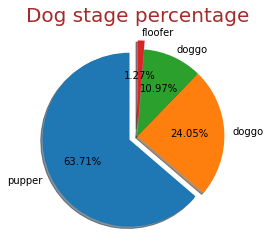

In [81]:
labels = 'pupper', 'doggo', 'doggo', 'floofer'
sizes = [151,57, 26, 3]
 
fig1, ax1 = plt.subplots()
explode = (0.1, 0, 0, 0.1) 
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title("Dog stage percentage", size= 20, c= 'Brown')
plt.show()

#### Insight #2: 

##### Define: 

For this insight, the most common breed based on the three predictions will be discovered.

##### code

In [82]:
dog_df = twitter_archive_master[['Breed_Type_1', 'Breed_Type_2', 'Breed_Type_3']]

breed_1 = dog_df.Breed_Type_1.value_counts().max()
breed_2 = dog_df.Breed_Type_2.value_counts().max()
breed_3 = dog_df.Breed_Type_3.value_counts().max()

x = dog_df['Breed_Type_1'].value_counts().idxmax()
y = dog_df['Breed_Type_2'].value_counts().idxmax()
z = dog_df['Breed_Type_3'].value_counts().idxmax()

##### Explanition: 

In [83]:
print('\n''Based on the three predictions, the most common breed is as follows: :\n\n Prediction 1:', x,'(',breed_1,')',
      '\n Prediction 2:', y, '(',breed_2,')', '\n Prediction 3:', z,'(',breed_3,')')


Based on the three predictions, the most common breed is as follows: :

 Prediction 1: golden retriever ( 129 ) 
 Prediction 2: labrador retriever ( 91 ) 
 Prediction 3: labrador retriever ( 66 )


 ________________________________________________________

#### Insight #3:

##### Define

For this insight, I will explore whether the three prediction confidences are accurate or not. Each prediction confidence column will be averaged. Also, the "true" and "false" will be counted to find their percentages. Therefore, if the percentage of the decision is higher and the average of the prediction is higher, then the prediction is accurate, and vice versa. 

##### Code

In [84]:
true_Prediction1 = (twitter_archive_master['Dog_Prediction_1'].value_counts()[True])/(len(twitter_archive_master))*100    
true_Prediction2 = (twitter_archive_master['Dog_Prediction_2'].value_counts()[True])/(len(twitter_archive_master))*100
true_Prediction3 = (twitter_archive_master['Dog_Prediction_3'].value_counts()[True])/(len(twitter_archive_master))*100

true_Prediction1, true_Prediction2, true_Prediction3

(89.16786226685797, 89.23959827833573, 85.65279770444764)

In [85]:
false_Prediction1 = (twitter_archive_master['Dog_Prediction_1'].value_counts()[False])/(len(twitter_archive_master))*100
false_Prediction2 = (twitter_archive_master['Dog_Prediction_2'].value_counts()[False])/(len(twitter_archive_master))*100
false_Prediction3 = (twitter_archive_master['Dog_Prediction_3'].value_counts()[False])/(len(twitter_archive_master))*100

false_Prediction1, false_Prediction2, false_Prediction3

(10.832137733142037, 10.760401721664275, 14.347202295552366)

In [86]:
Confidence_1 = twitter_archive_master.Prediction_Confidence_1.mean()*100
Confidence_2 = twitter_archive_master.Prediction_Confidence_2.mean()*100
Confidence_3 = twitter_archive_master.Prediction_Confidence_3.mean()*100

Confidence_1,Confidence_2,Confidence_3

(61.688365954088994, 13.74045816617649, 6.0364111013665775)

##### Results 

In [87]:
if true_Prediction1 > false_Prediction2 + Confidence_1 > 50:
    print("Prediction 1 is accurate.")
else:    
    print("Prediction 1 is not accurate.")
    
if true_Prediction2 > false_Prediction2 + Confidence_2 > 50:
     print("Prediction 2 is accurate.")
else:
    print("Prediction 2 is not accurate.")
    
if true_Prediction3 > false_Prediction3 + Confidence_3 > 50:
     print("Prediction 3 is accurate.")
else:
    print("Prediction 3 is not accurate.")

Prediction 1 is accurate.
Prediction 2 is not accurate.
Prediction 3 is not accurate.


##### ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

<a id='Reference_List'></a>
## Reference List

1-	https://learn.udacity.com/nanodegrees/nd002-mcit/parts/cd0015/lessons/ls0525/concepts/e5c4866c-0d8b-4978-a1e4-170871c64fae 

2-	https://sparkbyexamples.com/pandas/pandas-get-column-names/#:~:text=You%20can%20get%20the%20column,it%20using%20print()%20statement. 

3-	https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/ 

4-	https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe 

5-	https://sparkbyexamples.com/pandas/pandas-loc-multiple-conditions/#:~:text=When%20you%20wanted%20to%20select,i.e.%20columns%20and%20rows. 

6-	https://sparkbyexamples.com/pandas/pandas-check-column-contains-a-value-in-dataframe/#:~:text=You%20can%20check%20if%20a,isin()%20%2C%20str. 

7-	https://www.youtube.com/watch?v=mVH_I6nLOrs 

8-	https://www.youtube.com/watch?v=xhNSDQ1dbBA 

9-	https://learn.udacity.com/nanodegrees/nd002-mcit/parts/cd0015/lessons/ls2231/concepts/56b531fe-d8db-4825-ad56-c9a79cd6302e 

10-	https://www.geeksforgeeks.org/python-pandas-series-str-extract/ 

11-	https://sparkbyexamples.com/pandas/pandas-merge-multiple-dataframes-2/#:~:text=Pandas%20merge()%20function%20is,()%20to%20merge%20multiple%20Dataframes. 

12-	https://www.sharpsightlabs.com/blog/pandas-isnull/ 

13-	https://sparkbyexamples.com/pandas/pandas-drop-rows-with-condition/#:~:text=Use%20pandas.,rows%20with%20condition(s). 

14-	https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value 

15-	https://datatofish.com/replace-character-pandas-dataframe/ 

16-	https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isupper.html#:~:text=Check%20whether%20all%20characters%20in,element%20of%20the%20Series%2FIndex. 

17-	https://www.w3resource.com/pandas/series/series-str-islower.php#:~:text=The%20str.,element%20of%20the%20Series%2FIndex. 

18-	https://datatofish.com/replace-character-pandas-dataframe/ 

19-	https://www.youtube.com/watch?v=CA4tSV-oJoY 

20-	https://www.statology.org/pandas-rename-columns/ 

21-	https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas 

22-	https://sparkbyexamples.com/pandas/pandas-convert-columns-to-string-type/ 

23-	https://www.geeksforgeeks.org/saving-a-pandas-dataframe-as-a-csv/ 

24-	https://www.statology.org/pandas-value_counts-percentage/ 

25-	https://re-thought.com/how-to-change-or-update-a-cell-value-in-python-pandas-dataframe/ 

26-	https://datagy.io/matplotlib-bar-charts/ 

27-	https://stackoverflow.com/questions/63620128/using-pandas-value-counts-under-defined-condition 
